# Description of Data
0. country: The nation's name
1. child_mort: Number of deaths per 1000 live births among children under the age of five
2. exports: The amount of products and services exported each person. expressed as a percentage of GDP per person
3. health: Per capita total health spending. As a percentage of GDP per person
4. Imports: Per capita imports of goods and services. expressed as a percentage of GDP per person
5. Income: Individual net income
6. Inflation: The calculation of the GDP's yearly growth rate
7. life_expec: The typical lifespan of a newborn assuming the continuation of the existing mortality trends
8. total_fer: The total number of offspring that any mother would have if the current mortality patterns are to remain the same
8. total_fer:-The number of children that would be born to each woman if the current age-fertility rates remain the same.
9. gdpp:- The GDP per capita. Calculated as the Total GDP divided by the total population.

There are total of `10 columns` in the actual dataset.
From the data, we can see that `exports`, `health` and `imports` are given as percentage of GDP. Hence we have to
convert these columns to absolute values in the EDA section

# Import necessary libraries

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Read data for understanding

In [2]:
country_df = pd.read_csv('/content/country_data.csv')


In [3]:
# Checking the top 3 rows
country_df.head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460


### Statistical summary

In [4]:
# Checking data distribution
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Examine the `country_df` dataframe's different components, including its
- `shape` for the number of rows and columns.
- `size` for memory consumption
- `info()` to determine if any null values exist.
- Use `nunique()` to determine the number of unique entries in each column, assuming that all columns are categorical in nature.
- `nunique() and duplicated` for the analysis of duplicates
- Use `describe()` to obtain statistical data.

In [5]:
# Checking the size of the dataframe
country_df.size

1670

In [6]:
# Checking the shape of the dataframe
country_df.shape

(167, 10)

In [7]:
# Inspecting type
print(country_df.dtypes)


country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object


In [8]:
# Looking for any null value in any column
print(country_df.isnull().sum())

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


In [9]:
country_df.duplicated().sum()

0

In [10]:
# How many types of each data type column exists and total memory usage
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


`info` indicates that no null values are present. However, we will use `isnull()` to check in the EDA section.
Additionally, `info` demonstrates that all of the columns are numerical and continuous, with the exception of the `country` column.


In [11]:
# Checking the number of unique values each column possess to identify categorical columns
country_df.nunique().sort_values()

life_expec    127
total_fer     138
child_mort    139
exports       147
health        147
imports       151
income        156
inflation     156
gdpp          157
country       167
dtype: int64

The dataframe contains no categorical variables; instead, all of the variables are continuous numerical variables, as indicated by the `nunique()` function.

Additionally, there are `167` rows and `country` has`167` unique values. This indicates that each row's **country** column is unique, preventing duplicate records.


In [47]:
# Converting exports,imports and health spending percentages to absolute values.

country_df['exports'] = country_df['exports'] * country_df['gdpp']/100
country_df['imports'] = country_df['imports'] * country_df['gdpp']/100
country_df['health'] = country_df['health'] * country_df['gdpp']/100

country_df.head() # Lets check data after conversion

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,305.809,231.803222,1373.08241,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,46838.680,10956.905500,81298.56600,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,76383.744,8294.797200,62459.62400,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,77631.407,3551.356500,53457.26100,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,677222.000,89750.520000,876667.60000,19100.0,1.44,76.8,2.13,12200.0


In [48]:
numerical_cols = list(country_df.columns) # Get all column names
numerical_cols.remove('country') # Remove country as its not numerical
numerical_cols

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

## Understand the data with the help of plot

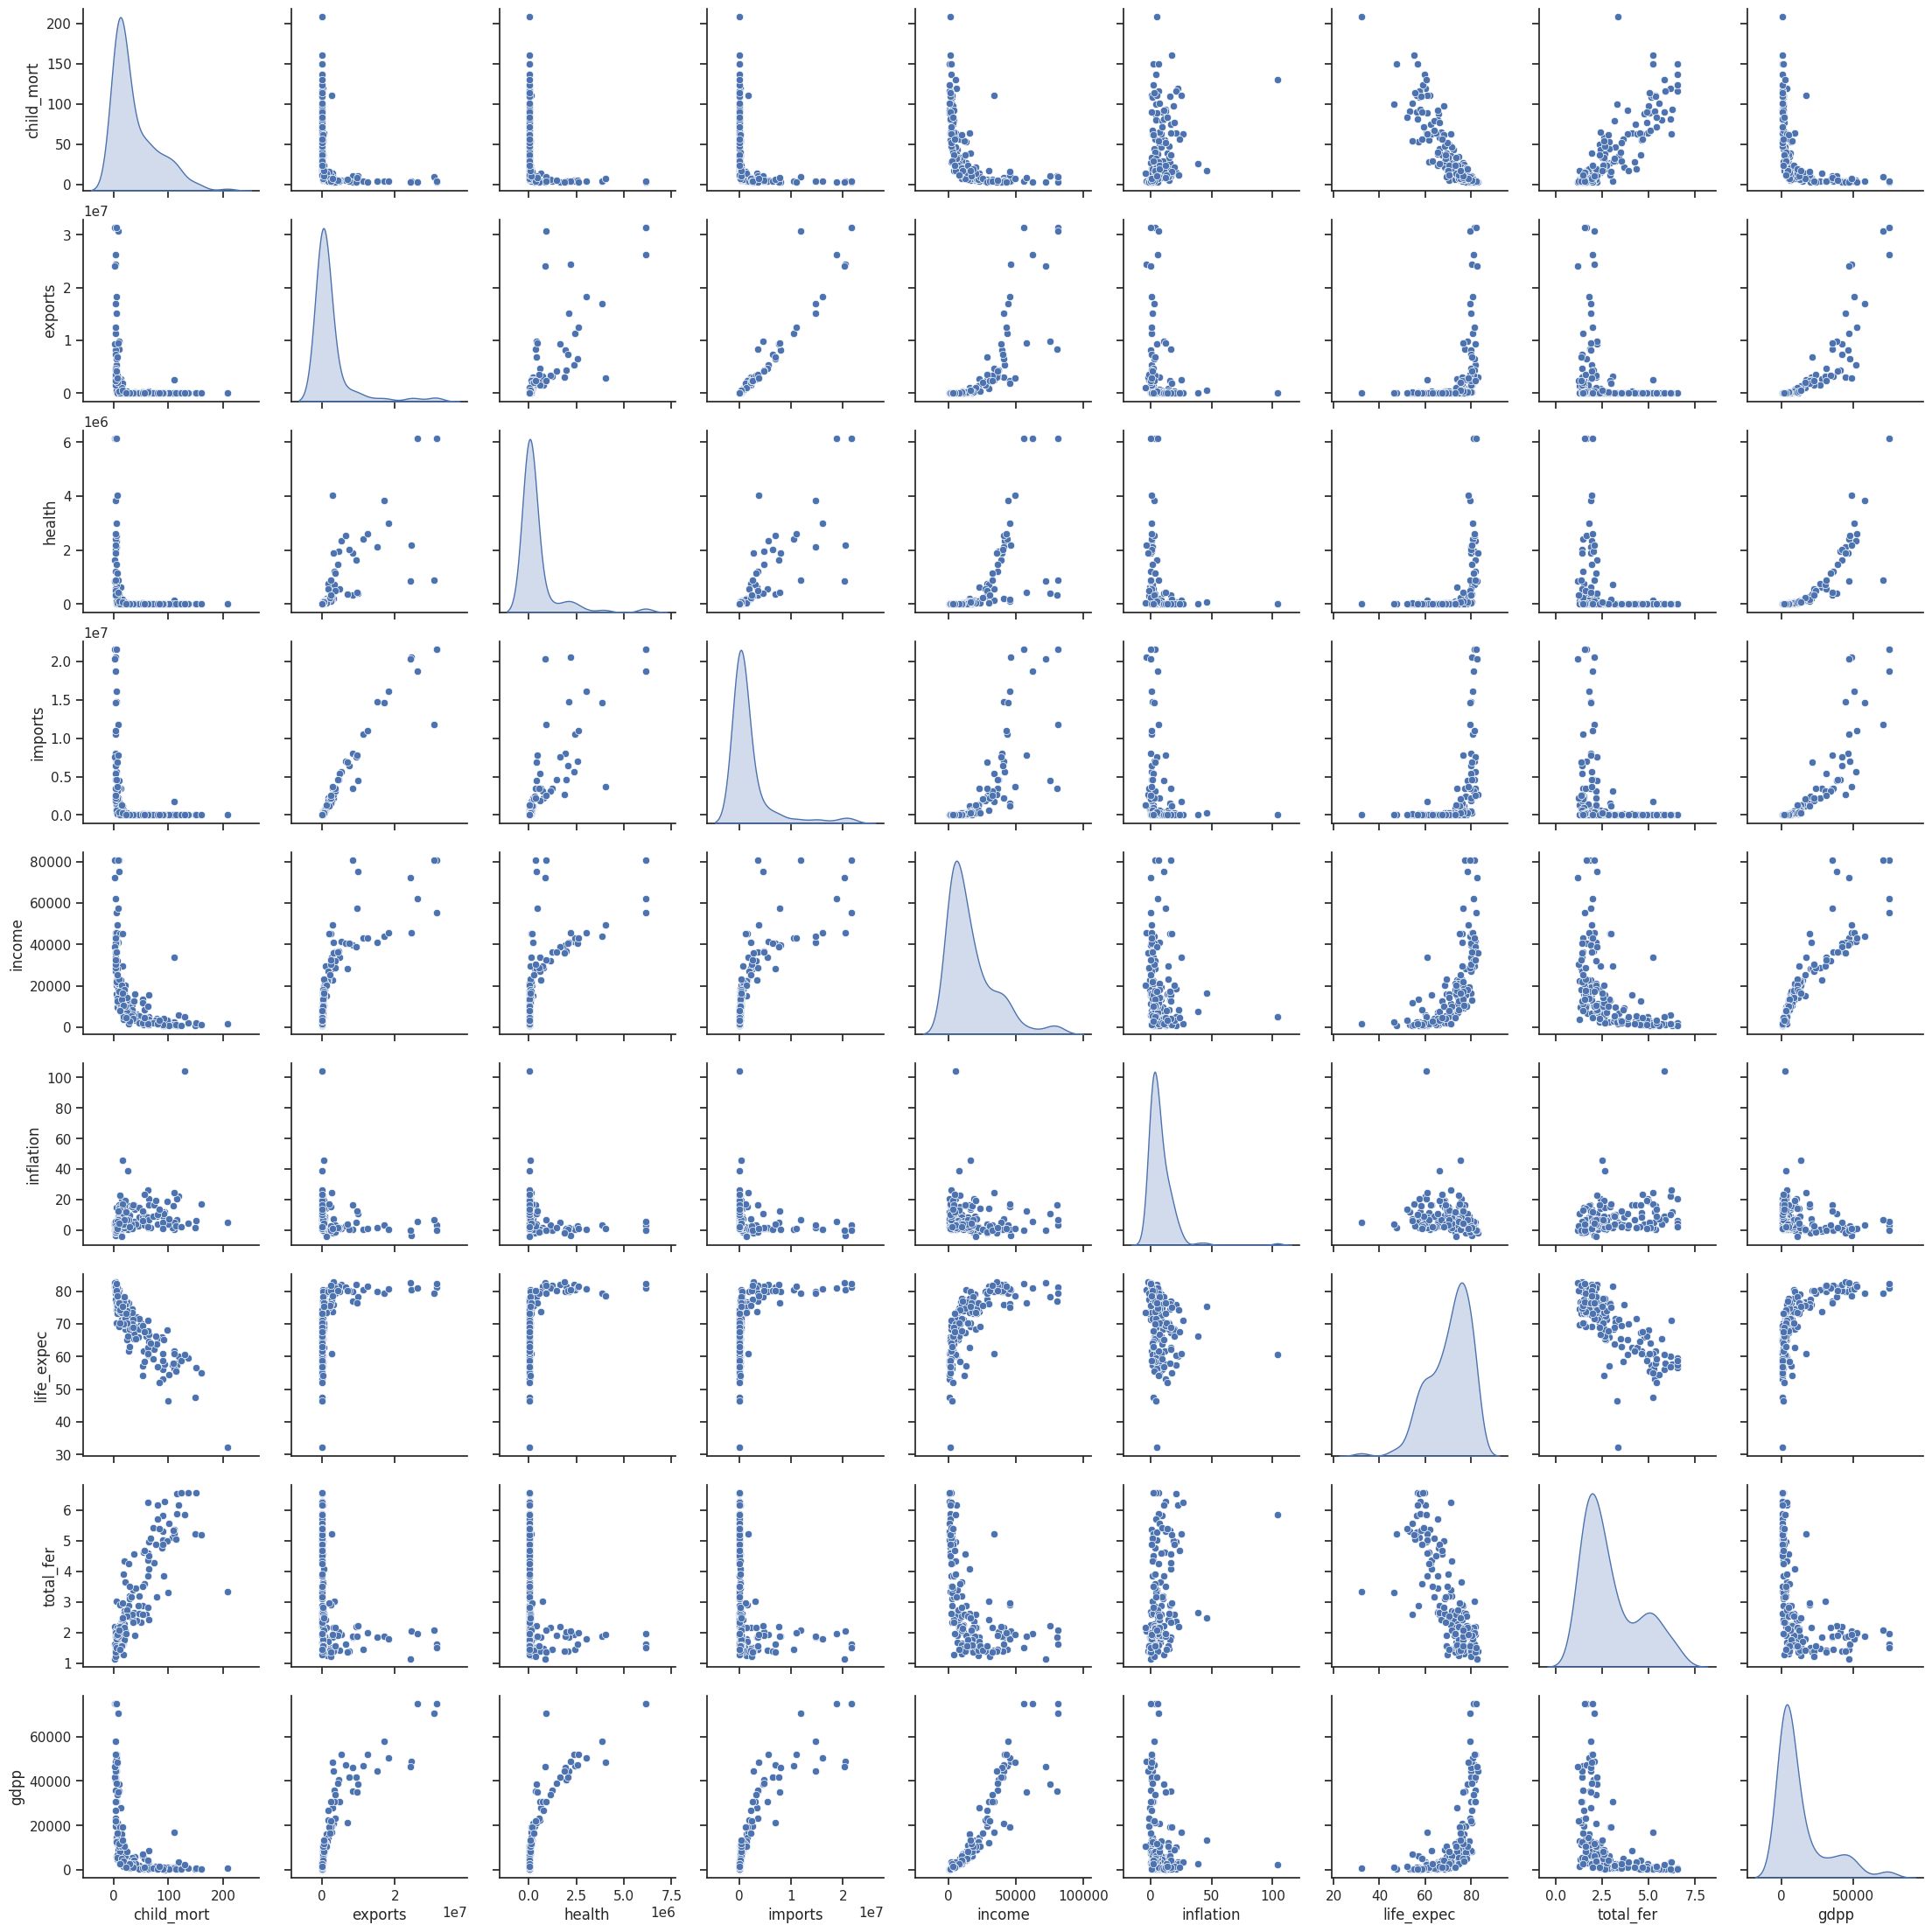

In [67]:
# Assuming numerical_cols contains the list of numerical column names
sns.set(style="ticks", color_codes=True)
sns.pairplot(country_df[numerical_cols], diag_kind="kde", markers="o")
plt.show()


## Heatmap-Based Visualization of Correlation

We can show the relationship between the various features in the dataset visually by making a heatmap. In order to make the data patterns easier to understand at a glance, darker hues, like red and green, indicate strong positive and negative connections, while lighter shades show weak or mild relationships.

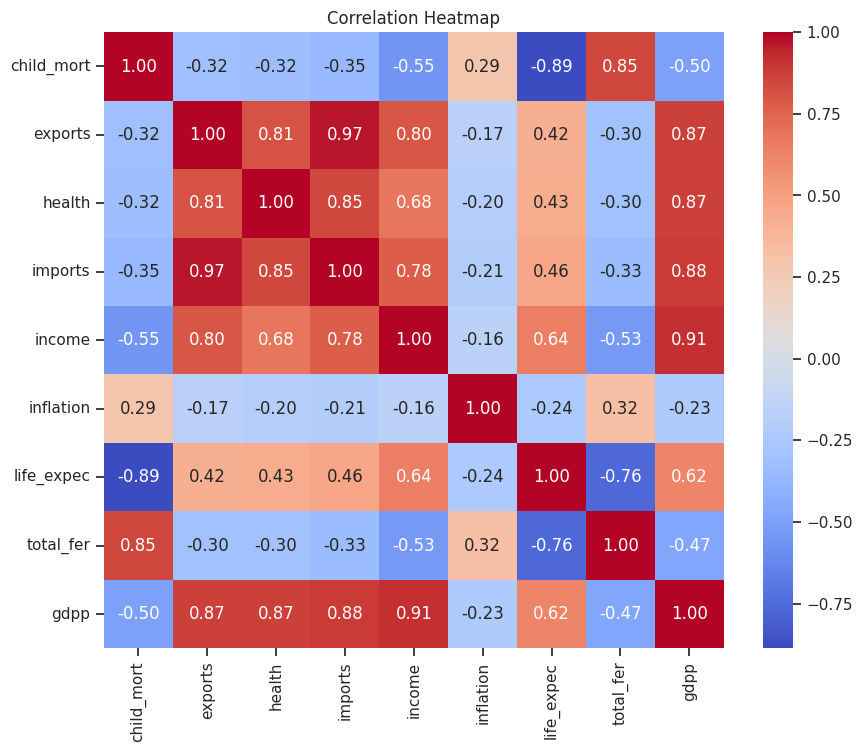

In [69]:
# Assuming numerical_cols contains the list of numerical column names
correlation_matrix = country_df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Visualising univariate distributions using boxplots to identify outliers

Boxplots are a great way to visualise univariate data because they represent statistics such as the 25th percentile, 50th percentile, etc. We will use the boxplots to analyse the outliers. Lets first see the summary statistics of all the percentiles

In [51]:
country_df.describe(percentiles=[.1,.5,.25,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,1.670000e+02,1.670000e+02,1.670000e+02,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,2.415962e+06,4.148486e+05,2.013428e+06,16817.578137,7.781832,70.555689,2.942115,12709.291171
std,40.328931,6.276964e+06,1.067562e+06,4.980018e+06,17808.895848,10.570704,8.893172,1.497990,17252.698522
min,2.600000,1.063997e+01,6.179818e+01,6.432789e+00,609.000000,-4.210000,32.100000,1.150000,231.000000
10%,4.200000,6.562280e+02,2.282184e+02,1.319468e+03,1524.000000,0.587800,57.820000,1.452000,593.800000
25%,8.250000,5.715207e+03,1.214662e+03,8.344850e+03,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,7.978500e+04,1.461362e+04,9.344256e+04,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,1.248926e+06,1.297676e+05,1.253216e+06,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,7.043358e+06,1.535350e+06,5.970691e+06,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,1.430501e+07,2.399156e+06,1.154782e+07,48290.000000,20.870000,81.400000,5.861000,48610.000000


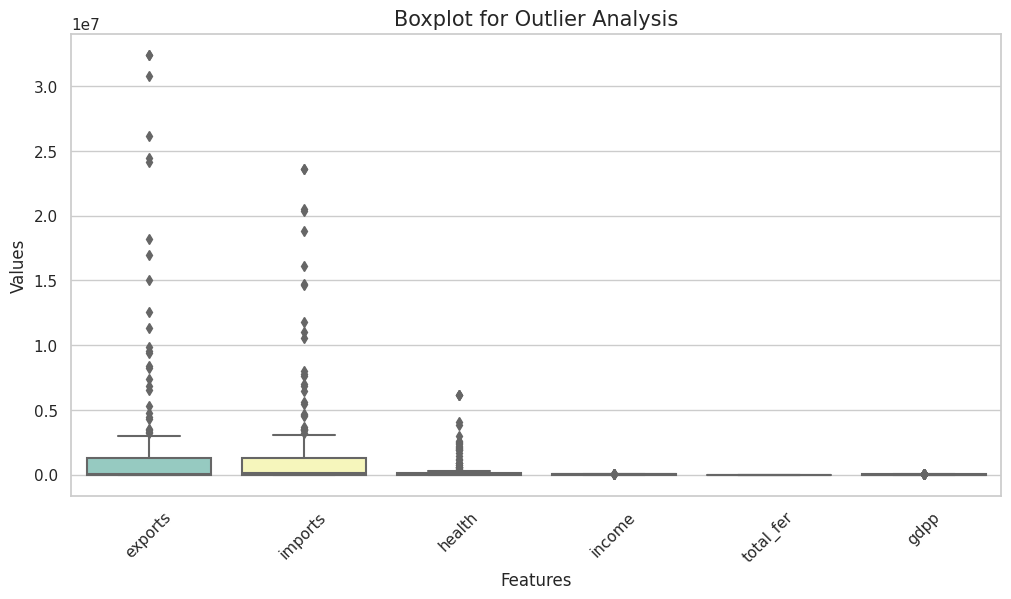

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your code for capping outliers
higher_outlier_cols = ['exports', 'imports', 'health', 'income', 'total_fer', 'gdpp']

for col in higher_outlier_cols:
    Q4 = country_df[col].quantile(0.99)  # Get 99th quantile
    country_df.loc[country_df[col] >= Q4, col] = Q4  # outlier capping

# Function to create a beautiful boxplot
def boxplot_for_outlier_analysis(data):
    plt.figure(figsize=(12, 6))
    sns.set(style="whitegrid")  # Set the style of the plot
    sns.boxplot(data=data[higher_outlier_cols], palette="Set3")  # Create the boxplot using seaborn
    plt.title("Boxplot for Outlier Analysis", fontsize=15)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.xlabel("Features", fontsize=12)
    plt.ylabel("Values", fontsize=12)
    plt.show()

# Call the function to generate the boxplot
boxplot_for_outlier_analysis(country_df)


In [53]:
def boxplot_for_outlier_analysis():
    plt.figure(figsize=[16,12])
    i=1 # to track the ith plot in the subplot
    for col in numerical_cols:
        plt.subplot(3,3,i)
        sns.boxplot(y=country_df[col])
        plt.title(col)
        plt.ylabel('')
        i+=1

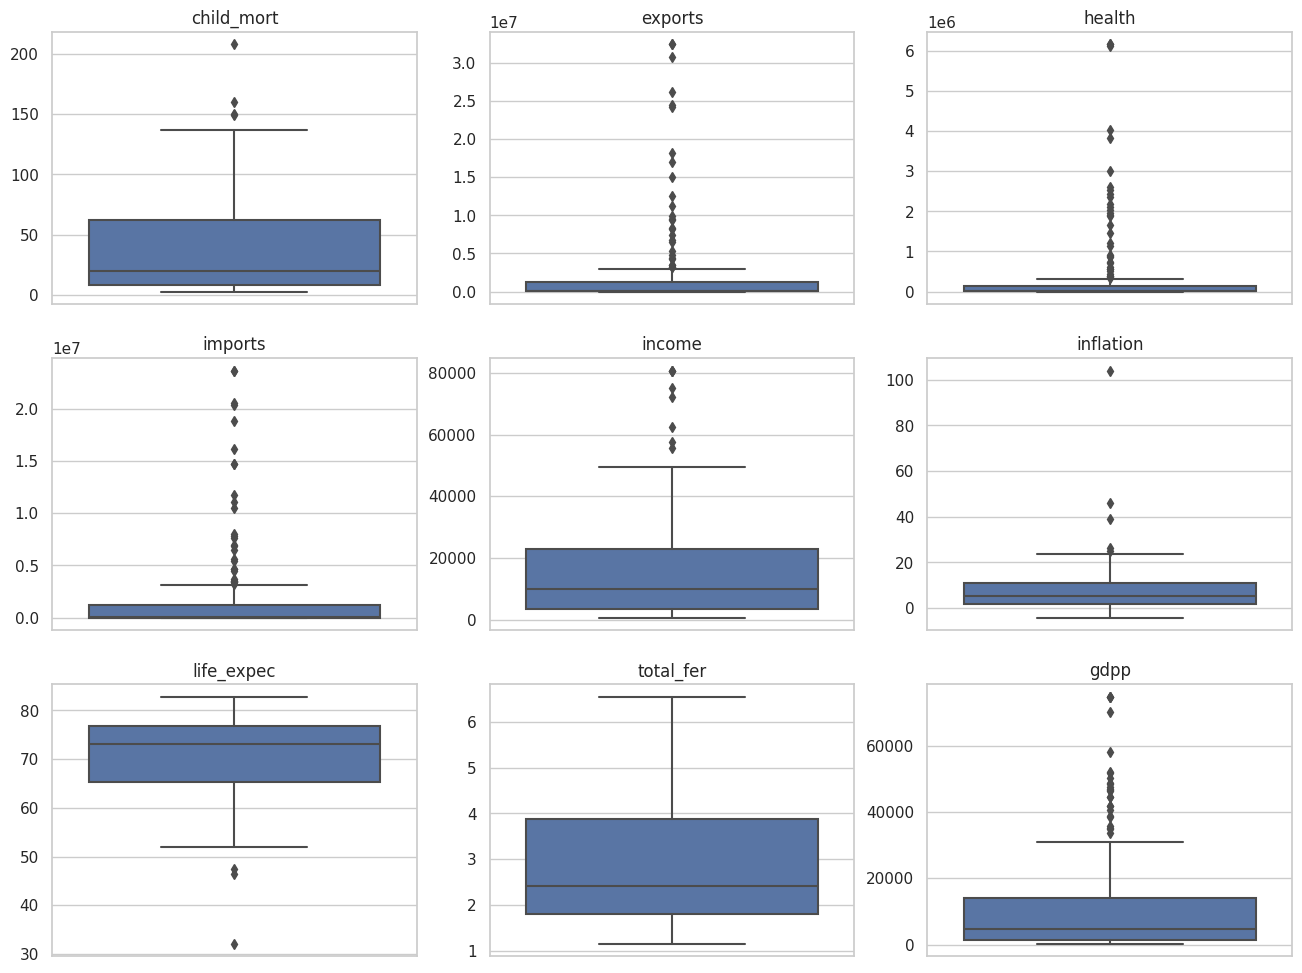

In [54]:
boxplot_for_outlier_analysis()

To comprehend cluster tendency, use the Hopkins test.

It's crucial to determine whether or not the provided data has any meaningful clusters before applying any clustering algorithms to it. This indicates that the data is typically not random.

- The **clustering tendency** is the process of analyzing the data to determine whether or not clustering is feasible.

- The **Hopkins test** is used to examine cluster tendency.

The `Hopkins test` is used to determine whether data points in a multidimensional space differ noticeably from data that is uniformly distributed.

In [58]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

In [79]:
hopkins(country_df[numerical_cols])

0.9629980836806588

### Interpretation of Hopkins score:

The Hopkins Statistic measures how well a dataset can be clustered. A score over 0.70 suggests good clustering potential. Values near 1 indicate highly clustered data, while around 0.5 suggests randomness. Repeated tests show our dataset consistently scores between 0.86 to 0.97, confirming it's suitable for clustering analysis, giving confidence in our analysis.

In [71]:
# Scaling on numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # instantiate scaler

country_df_scaled = scaler.fit_transform(country_df[numerical_cols]) # fit parameters to have mean 0 and SD as 1 and transform data accordingly
country_df_scaled = pd.DataFrame(country_df_scaled, columns = numerical_cols) # convert to dataframe
country_df_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.398645,-0.390760,-0.435421,-0.857044,0.157336,-1.619092,1.927006,-0.707219
1,-0.538949,-0.390733,-0.380624,-0.417070,-0.388017,-0.312347,0.647866,-0.865172,-0.501353
2,-0.272833,-0.385709,-0.383140,-0.421396,-0.220587,0.789274,0.670423,-0.034884,-0.479818
3,2.007808,-0.385497,-0.387623,-0.423462,-0.615202,1.387054,-1.179234,2.154665,-0.533947
4,-0.695634,-0.283549,-0.306158,-0.234452,0.128929,-0.601749,0.704258,-0.543770,-0.029323
...,...,...,...,...,...,...,...,...,...
162,-0.225578,-0.391707,-0.386603,-0.425063,-0.781504,-0.489784,-0.852161,0.373564,-0.566541
163,-0.526514,-0.310381,-0.306409,-0.362089,-0.017643,3.616865,0.546361,-0.316111,0.046342
164,-0.372315,-0.396596,-0.389870,-0.432576,-0.694688,0.409732,0.286958,-0.664296,-0.663159
165,0.448417,-0.397821,-0.390139,-0.434381,-0.695252,1.500916,-0.344633,1.156981,-0.663159


# For clustering, apply the K-means algorithm.

After scaling each numerical feature, let's use the clustering technique to construct the unsupervised model. In clustering, there are numerous algorithms available. We'll choose a widely used algorithm like

**A method for K-means**

The **Kmeans algorithm** divides the dataset into K pre-specified unique non-overlapping subgroups (clusters), with each data point belonging to a single group, through an iterative process.


## Metrics to determine K's value
Optimising k or {number of clusters} is the primary challenge in this algorithm. There are popular methods that aid in locating k:

1. Elbow technique
2. Profile Evaluation 
### Elbow Approach

The {sum of squared distance (SSD)} between data points and the centroids of the clusters to which they have been assigned provides us with an estimate of an appropriate k number of clusters using the elbow method. At the point where SSE begins to flatten out and form an elbow, we pick k.

To determine where the elbow is formed, let's use {KMeans(){ from {sklearn{ to create clusters of 2, 3, 4, and so on up to 11. Then, we can compute SSD and plot the number of clusters and SSD.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

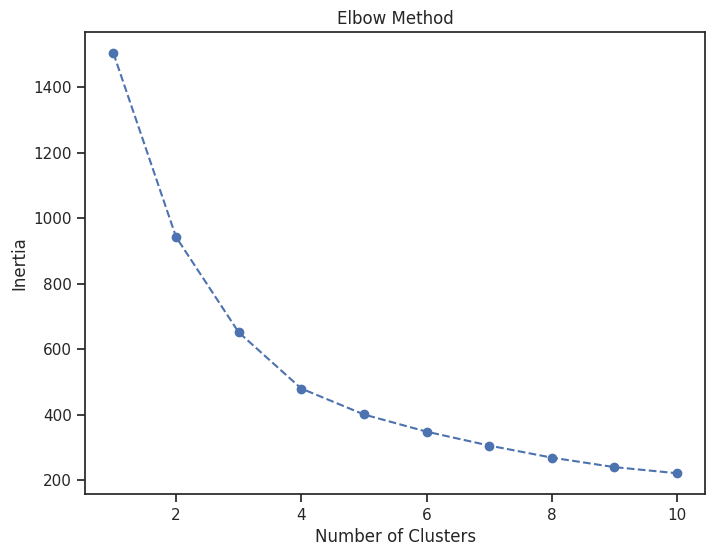

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [72]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Applying KMeans clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_data)




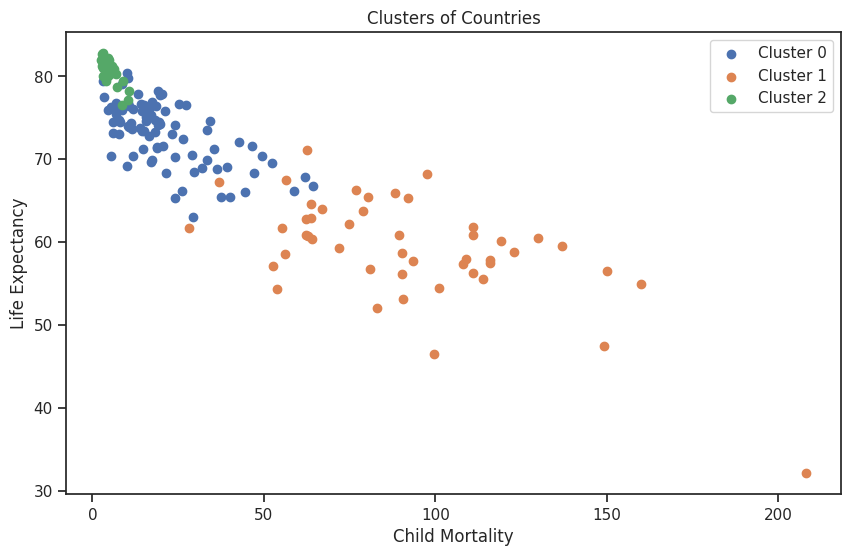

In [73]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
for i in range(3):
    cluster_data = data[data['cluster'] == i]
    plt.scatter(cluster_data['child_mort'], cluster_data['life_expec'], label=f'Cluster {i}')
plt.xlabel('Child Mortality')
plt.ylabel('Life Expectancy')
plt.title('Clusters of Countries')
plt.legend()
plt.show()

### Silhouette Analysis

The silhouette score is a measure of how similar an object is to its own cluster (`cohesion`) compared to other clusters (`separation`).

Lets use `KMeans()` from `sklearn` to form clusters of 2,3,4 and so on till 11 and calculate `silhouette_score` and plot the `number of clusters` against `silhouette_score`

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

For k_clusters=2, the silhouette score is 0.513937
For k_clusters=3, the silhouette score is 0.441140
For k_clusters=4, the silhouette score is 0.418914
For k_clusters=5, the silhouette score is 0.423013
For k_clusters=6, the silhouette score is 0.321447
For k_clusters=7, the silhouette score is 0.334172
For k_clusters=8, the silhouette score is 0.306707


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k_clusters=9, the silhouette score is 0.313708
For k_clusters=10, the silhouette score is 0.336425


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


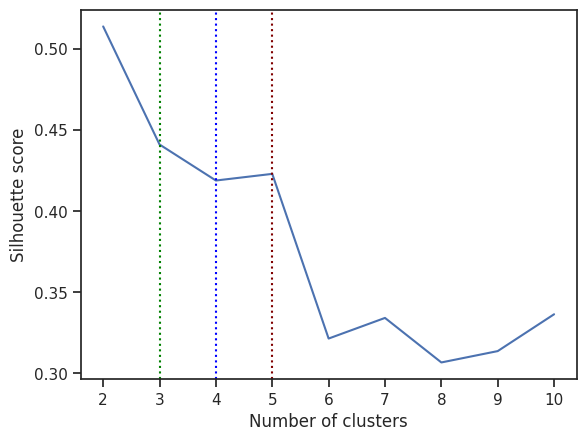

In [74]:
# Silhouette score

from sklearn.metrics import silhouette_score
silhouette_scores_list = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(country_df_scaled) # intialise kmeans
    silhouette_avg = silhouette_score(country_df_scaled, kmean.labels_) # silhouette score
    silhouette_scores_list.append([k, silhouette_avg])
    print("For k_clusters={0}, the silhouette score is {1:2f}".format(k, silhouette_avg))

temp = pd.DataFrame(silhouette_scores_list)
ax = plt.axes()
ax.plot(temp[0], temp[1])
ax.axvline(3, ls='dotted',color='green') # elbow formed as 3
ax.axvline(4, ls='dotted',color='blue') # elbow formed as 3
ax.axvline(5, ls='dotted',color='maroon') # elbow formed as 3
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [75]:
# Function for all steps of Kmean Clustering; Call with K=3,4,5
def K_means_model(k):
    kmean = KMeans(n_clusters = k, random_state = 50+k)
    kmean.fit(country_df_scaled)
    country_df_kmean = country_df.copy() # copy the actual data into a new dataframe to explain the cluster profiling
    label  = pd.DataFrame(kmean.labels_, columns= ['k_means_cluster_label'])
    country_df_kmean = pd.concat([country_df_kmean, label], axis =1) # assign the countries with the cluster labels.
    print("Number of countries in each cluster(k=%s):" %k)
    print(country_df_kmean.k_means_cluster_label.value_counts())# shows how many countries are in each cluster
    return(country_df_kmean) # returns clustered labelled dataset for further analysis

- The silhouette score is maximum when k is 2 which is 0.47
- 2 is very less number of clusters and countries within the 2 clusters might be very different.

So lets look at the next optimal silhouette score.

- 3,4,5 seem to have good silhouette scores. As k increases, silhouette score decreases and hence these will have definitely lesser sihouette score than that of k=2.
- Though elbow curve indicate 3 is optimal number and silhouette score of 3 seem to be the best, lets use K-means algorithm for k=3,4,5 and see which value of k gives us better `cluster profiling`

In [77]:
# Function for Profiling Clusters to plot scatter plots
def clusters_scatter_plots(col1, col2):
    plt.figure(figsize=(18,8))
    plt.subplot(2,2,1)
    sns.scatterplot(x = col1, y = col2, hue = 'k_means_cluster_label', data = K_means_model(3), palette=['blue','green','red'])
    plt.subplot(2,2,2)
    sns.scatterplot(x = col1, y = col2, hue = 'k_means_cluster_label', data = K_means_model(4), palette=['orange', 'blue', 'green', 'red'])
    plt.subplot(2,2,3)
    sns.scatterplot(x = col1, y = col2, hue = 'k_means_cluster_label', data = K_means_model(5), palette=['red','orange','maroon','green','blue'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of countries in each cluster(k=3):
1    96
0    48
2    23
Name: k_means_cluster_label, dtype: int64
Number of countries in each cluster(k=4):
0    81
2    48
3    29
1     9
Name: k_means_cluster_label, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of countries in each cluster(k=5):
1    79
3    47
4    28
2    10
0     3
Name: k_means_cluster_label, dtype: int64


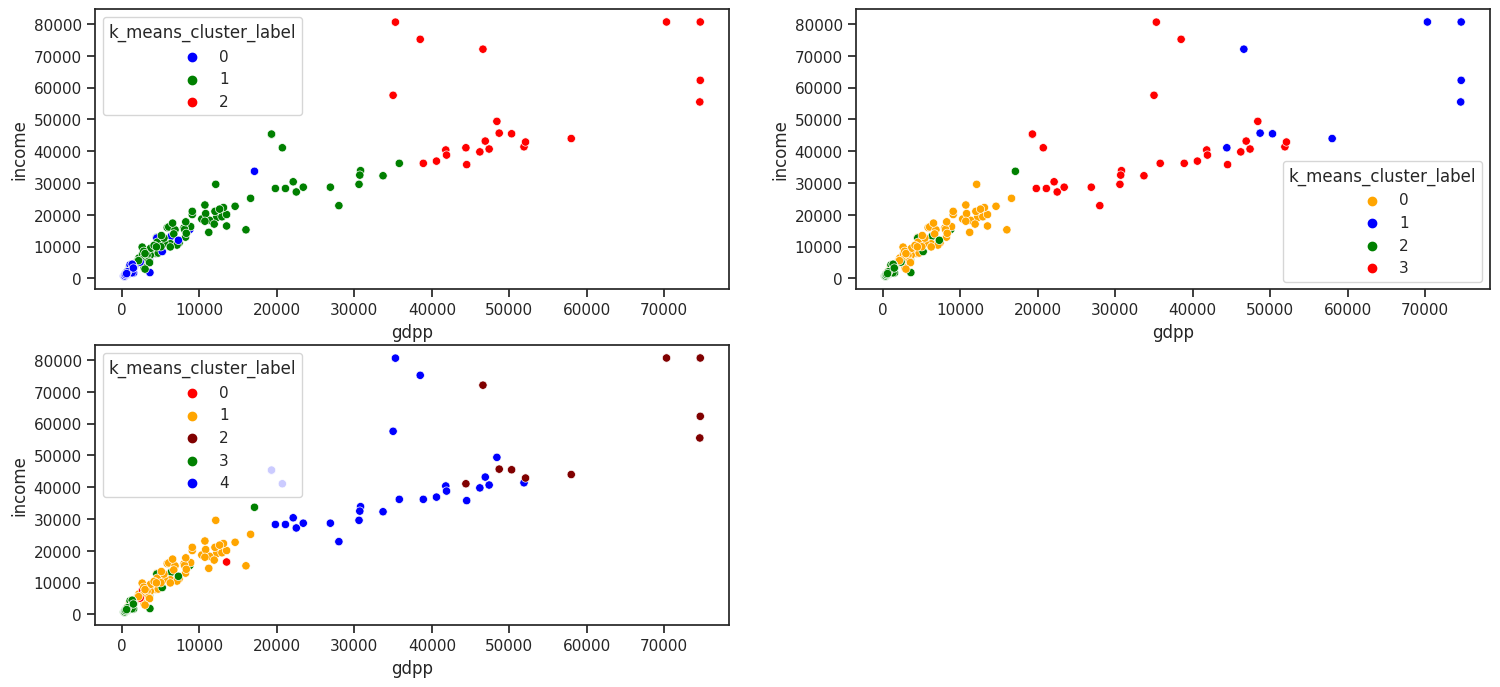

In [78]:
clusters_scatter_plots('gdpp','income')

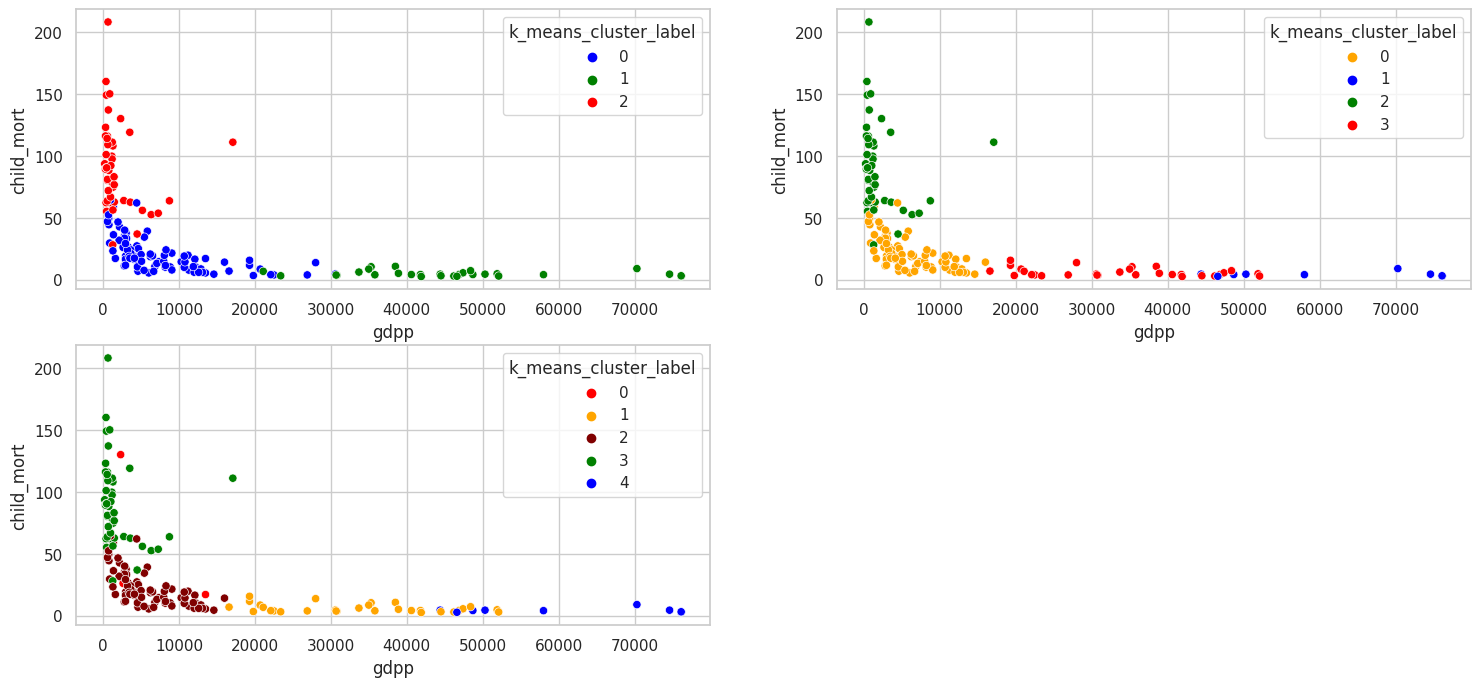

In [36]:
clusters_scatter_plots('gdpp','child_mort')

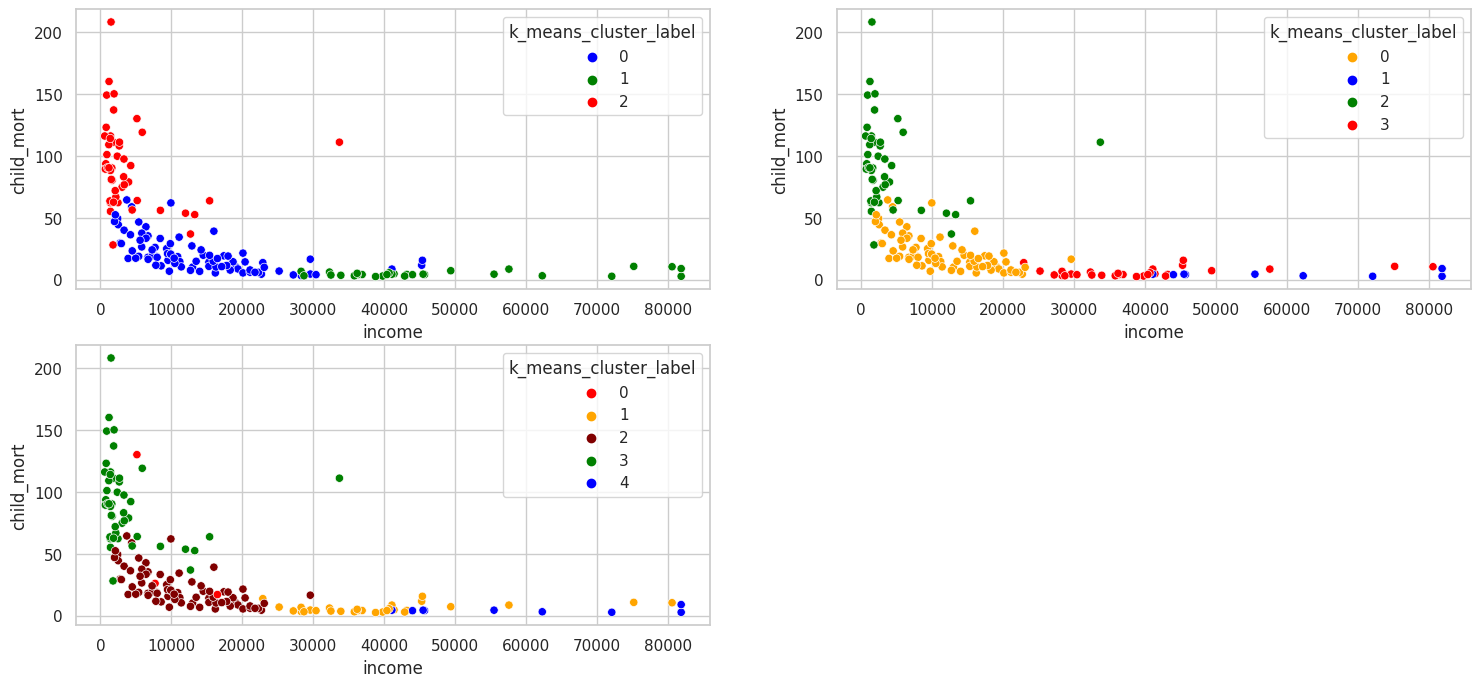

In [37]:
clusters_scatter_plots('income','child_mort')